#Import Libraries


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
# pip install keybert

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import numpy as np
from keras.datasets import imdb
from matplotlib import pyplot as plt
import pandas as pd
import json
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import nltk
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pprint
import nltk
nltk.download('wordnet')
from keybert import KeyBERT
from collections import Counter
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


#Data Loading

In [ ]:
#Train
df = pd.read_csv("TUM.csv",  encoding = "ISO-8859-1")
df = df.dropna(axis=1,how='all')
df = df.dropna()
# print(df)
print(len(df))
df.to_csv('TUM_after_Preprocesing.csv', index=False)

337


#Preprocessing

In [ ]:
columns = []
for i in range(len(df.columns)):
  columns.append(df.columns[i])
columns

['University',
 'Abbreviation',
 'Department',
 'Course title',
 'Unit',
 'Professor',
 'Objective',
 'Prerequisite',
 'Required Skills',
 'References',
 'Description',
 'University Homepage']

In [ ]:
print(columns.index("Objective"),
columns.index("Description"),
columns.index("Prerequisite"))


6 10 7


In [ ]:
import re
words = {}
features = [columns.index("Objective"), columns.index("Description"),columns.index("Prerequisite"), columns.index("Required Skills")]
print(features)
#Train
for index, row in df.iterrows():
  rowFeatures=[]
  for ind in features:
    rowFeatures.append(re.split(r'\W+', row[ind]))
  rowFeatures = [j for sub in rowFeatures for j in sub]           # to 1d array
  # print(rowFeatures)

  # if index==3:
  #   print(rowFeatures)
    
  #Stemming:
  from nltk.stem import PorterStemmer
  porter = PorterStemmer()
  for idx,word in enumerate(rowFeatures):
    rowFeatures[idx] = porter.stem(word)
  # print(rowFeatures)

  # if index==3:
  #   print(rowFeatures)

  #Lemmatizing:
  from nltk.stem import WordNetLemmatizer
  lemmatizer = WordNetLemmatizer()
  for idx,word in enumerate(rowFeatures):
    rowFeatures[idx] = lemmatizer.lemmatize(word)
  # print(rowFeatures)


  # if index==3:
  #   print(rowFeatures)


  #Remove Stopwords:
  from nltk.corpus import stopwords
  stopWords = set(stopwords.words('english'))
  for idx,word in enumerate(rowFeatures):
    if word in stopWords:
      rowFeatures.remove(word)

    # if index==3:
    #   print(rowFeatures)
  words[index] = rowFeatures
    # print(names[index])

      
# print(labels)
print(len(words.values()))

[6, 10, 7, 8]
337


In [ ]:
print(words)

{0: ['upon', 'success', 'complet', 'modul', 'particip', 'understand', 'essenti', 'concept', 'comput', 'scienc', 'fundament', 'practic', 'orient', 'scientif', 'level', 'concept', 'thi', 'kind', 'for', 'exampl', 'algorithm', 'syntax', 'semant', 'well', 'a', 'effici', 'term', 'memori', 'consumpt', 'time', 'particip', 'then', 'abl', 'solv', 'well', 'pose', 'algorithm', 'problem', 'implement', 'basic', 'distribut', 'concurr', 'applic', 'java', 'a', 'similar', 'object', 'orient', 'languag', 'understand', 'underli', 'concept', 'model', 'are', 'therefor', 'abl', 'acquir', 'skill', 'other', 'imper', 'object', 'orient', 'program', 'languag', 'their', '', 'type', 'ass', 'exam', '120', 'minut', 'exam', 'take', 'form', '120', 'minut', 'written', 'test', 'question', 'allow', 'ass', 'acquaint', 'concept', 'informat', 'program', 'small', 'program', 'task', 'ass', 'the', 'abil', 'to', 'conceiv', 'appropri', 'algorithm', 'solut', 'realiz', 'concurr', 'applic', '', 'particip', 'attend', 'in0002', 'fundam

#Key-words Extraction Using  KeyBert

In [ ]:
kw_model = KeyBERT()
arrOfKeywords=[]

#Takes 3 mintues.....
for key, el in words.items():
    if len(el)==0:
      continue
    wordsString = ' '.join(el)
    keywords = kw_model.extract_keywords(wordsString, keyphrase_ngram_range=(1, 1), stop_words=None)
    arrOfKeywords.append(keywords)

# arr = [j for sub in arr for j in sub]
# onlyWordsOfRow = list(map(list, zip(*row)))[0] 
print(arrOfKeywords)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

[[('exam', 0.424), ('java', 0.3974), ('implement', 0.3795), ('practic', 0.3762), ('concept', 0.3469)], [('java', 0.4554), ('program', 0.4275), ('practic', 0.4011), ('interact', 0.3566), ('particip', 0.3431)], [('student', 0.4065), ('program', 0.3884), ('exam', 0.3796), ('implement', 0.3452), ('homework', 0.3162)], [('exam', 0.4241), ('comput', 0.421), ('basic', 0.4034), ('student', 0.3917), ('design', 0.3445)], [('project', 0.4164), ('program', 0.3749), ('student', 0.3704), ('comput', 0.3675), ('implement', 0.3547)], [('exam', 0.3746), ('workflow', 0.3601), ('method', 0.3551), ('student', 0.3511), ('concept', 0.321)], [('algorithm', 0.4298), ('exam', 0.3669), ('student', 0.2981), ('data', 0.2921), ('method', 0.281)], [('sql', 0.444), ('implement', 0.3802), ('conceptu', 0.3744), ('design', 0.3634), ('basic', 0.3609)], [('develop', 0.398), ('process', 0.3758), ('comput', 0.3517), ('exam', 0.3494), ('technolog', 0.3322)], [('comput', 0.3799), ('implement', 0.3496), ('program', 0.2907), ('

In [ ]:
s = ''
for i in range(len(arrOfKeywords)):
  for (word, score) in arrOfKeywords[i]:
    s += word + ' '

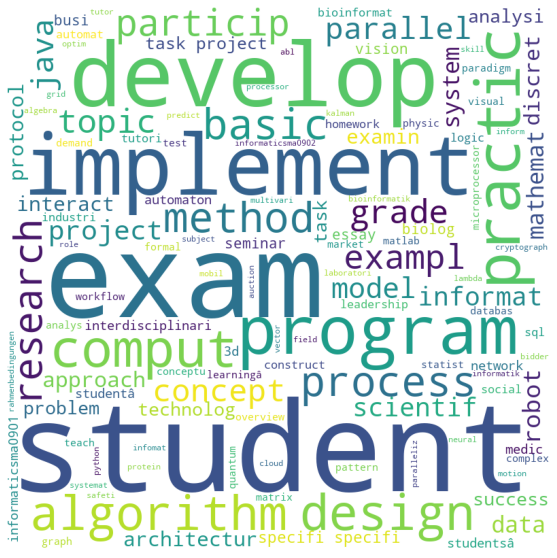

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(s)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wordcloud)                

 Creating Assiciated Table



In [ ]:
arrOfKeywordsWithoutSimilarity=[]
relatedNumKeyBert=[]
for row in arrOfKeywords:
  onlyWordsOfRow = list(map(list, zip(*row)))[0]                      # separate score of each word
  onlyNumOfRow = list(map(list, zip(*row)))[1]                      # separate score of each word
  if len(onlyWordsOfRow)==1:
    continue                                                        # noise
  relatedNumKeyBert.append(onlyNumOfRow)
  arrOfKeywordsWithoutSimilarity.append(onlyWordsOfRow)
# allWordsOfKeyBert=list(map(list, zip(*arr)))[0]
# countWords = Counter(allWordsOfKeyBert).items()                        # occarance of words
# sortedCountWords = sorted(countWords, key=lambda tup: tup[1], reverse = True) # sort it by number of them
# sortedCountWords

# allWordsOfKeyBert
# arr
# arrOfKeywordsWithoutSimilarity[290:300]
print(np.array(arrOfKeywordsWithoutSimilarity).shape,np.array(relatedNumKeyBert).shape)
# print(arrOfKeywords[0], "\n was converted to: \n",arrOfKeywordsWithoutSimilarity[0])

(327, 5) (327, 5)


In [ ]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(arrOfKeywordsWithoutSimilarity).transform(arrOfKeywordsWithoutSimilarity)
associatedTable = pd.DataFrame(te_ary, columns=te.columns_)
df.to_csv('associatedTable.csv', index=False)
associatedTable

,3d,abl,acid,algebra,algorithm,analys,analysi,anatomi,approach,approachesâ,...,visual,visualizt,vocabulari,wireless,wissenschaft,workflow,worksheet,workthroughout,write,xml
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
323,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
324,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
325,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


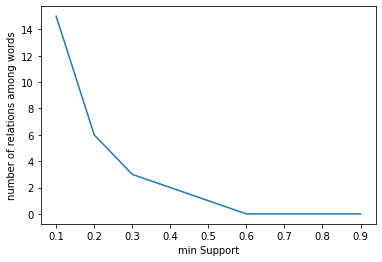

[15, 6, 3, 2, 1, 0, 0, 0, 0]


In [ ]:
from mlxtend.frequent_patterns import apriori
lenOfAssociatedRelations=[]
for minSupport in range(10,100,10):
  ind = minSupport/100
  associatedRelations = apriori(associatedTable, min_support=ind , use_colnames=True)
  lenOfAssociatedRelations.append(len(associatedRelations))

plt.xlabel("min Support")
plt.ylabel("number of relations among words")
plt.plot(["0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9",], lenOfAssociatedRelations )
plt.show()
print(lenOfAssociatedRelations)

In [ ]:
associatedRelations = apriori(associatedTable, min_support=0.1)
print("Recognized associated relations among row-indexes for min-support=0.1\n \n     Total rows of database=337\n\n" , associatedRelations)

Recognized associated relations among row-indexes for min-support=0.1
 
     Total rows of database=337

      support    itemsets
0   0.119266         (4)
1   0.137615        (45)
2   0.125382        (63)
3   0.253823        (64)
4   0.492355        (85)
5   0.229358       (113)
6   0.195719       (199)
7   0.226300       (206)
8   0.562691       (261)
9   0.107034    (64, 85)
10  0.186544   (64, 261)
11  0.103976   (85, 206)
12  0.308869   (261, 85)
13  0.143731  (261, 199)
14  0.119266  (261, 206)


#Third Phase

##Creating Embeddings

In [ ]:
!pip -q install sentence-transformers
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
model

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

In [ ]:
finalWords  = []
courseTitles = []
for key in words.keys():
  finalWords.append(words[key])
  courseTitles.append(df['Course title'][key])
print(finalWords)
print(courseTitles)

[['upon', 'success', 'complet', 'modul', 'particip', 'understand', 'essenti', 'concept', 'comput', 'scienc', 'fundament', 'practic', 'orient', 'scientif', 'level', 'concept', 'thi', 'kind', 'for', 'exampl', 'algorithm', 'syntax', 'semant', 'well', 'a', 'effici', 'term', 'memori', 'consumpt', 'time', 'particip', 'then', 'abl', 'solv', 'well', 'pose', 'algorithm', 'problem', 'implement', 'basic', 'distribut', 'concurr', 'applic', 'java', 'a', 'similar', 'object', 'orient', 'languag', 'understand', 'underli', 'concept', 'model', 'are', 'therefor', 'abl', 'acquir', 'skill', 'other', 'imper', 'object', 'orient', 'program', 'languag', 'their', '', 'type', 'ass', 'exam', '120', 'minut', 'exam', 'take', 'form', '120', 'minut', 'written', 'test', 'question', 'allow', 'ass', 'acquaint', 'concept', 'informat', 'program', 'small', 'program', 'task', 'ass', 'the', 'abil', 'to', 'conceiv', 'appropri', 'algorithm', 'solut', 'realiz', 'concurr', 'applic', '', 'particip', 'attend', 'in0002', 'fundament

In [ ]:
embeddings = model.encode(finalWords, normalize_embeddings=True)
embeddings.shape

(337, 384)

##Kmeans Clustring

In [ ]:
elbow_dict ={}

In [ ]:
from sklearn.cluster import KMeans
nClusters = 50
elbow_dict[nClusters] = []
kmeans = KMeans(n_clusters=nClusters)
kmeans.fit(embeddings)
kmeansPredictions = kmeans.predict(embeddings)
# kmeansPredictions

In [ ]:
clusters_label = {}
clusters_data = {}
courseTitles = np.asarray(courseTitles)
for i in range(nClusters):
  clusters_label[i] = []
  cluster = np.where(kmeansPredictions==i)[0]
  clusters_label[i] = courseTitles[cluster]
  clusters_data[i] = embeddings[cluster]
  print(f"Size of Cluster {i} is {clusters_data[i].shape[0]}")
  # print(len(clusters_label[i]))
  # print(clusters_data[i].shape[0])
# clusters_label  

Size of Cluster 0 is 53
Size of Cluster 1 is 7
Size of Cluster 2 is 4
Size of Cluster 3 is 5
Size of Cluster 4 is 10
Size of Cluster 5 is 20
Size of Cluster 6 is 49
Size of Cluster 7 is 23
Size of Cluster 8 is 27
Size of Cluster 9 is 8
Size of Cluster 10 is 13
Size of Cluster 11 is 19
Size of Cluster 12 is 8
Size of Cluster 13 is 4
Size of Cluster 14 is 6
Size of Cluster 15 is 8
Size of Cluster 16 is 3
Size of Cluster 17 is 3
Size of Cluster 18 is 2
Size of Cluster 19 is 5
Size of Cluster 20 is 6
Size of Cluster 21 is 1
Size of Cluster 22 is 1
Size of Cluster 23 is 2
Size of Cluster 24 is 2
Size of Cluster 25 is 1
Size of Cluster 26 is 4
Size of Cluster 27 is 1
Size of Cluster 28 is 6
Size of Cluster 29 is 1
Size of Cluster 30 is 1
Size of Cluster 31 is 2
Size of Cluster 32 is 1
Size of Cluster 33 is 1
Size of Cluster 34 is 1
Size of Cluster 35 is 1
Size of Cluster 36 is 1
Size of Cluster 37 is 7
Size of Cluster 38 is 1
Size of Cluster 39 is 1
Size of Cluster 40 is 1
Size of Cluster 41

##Clustring Evaluation

In [ ]:
intraDistance = 0
for i in range(nClusters):
  data = clusters_data[i]
  for j in range(data.shape[0]):
    for k in range(j+1, data.shape[0]):
       intraDistance += np.sum(np.square(data[j] - data[k]))     
print(intraDistance)

114.35880582077657


In [ ]:
interDistance = 0
for i in range(nClusters):
  for j in range(i+1, nClusters):
    dataCluster1 = clusters_data[i]
    dataCluster2 = clusters_data[j]
    for a in range(dataCluster1.shape[0]):
      for b in range(dataCluster2.shape[0]):
        interDistance += np.sum(np.square(dataCluster1[a] - dataCluster2[b]))   
print(interDistance)

69720.47853049636


In [ ]:
elbow_dict[nClusters] = [intraDistance, interDistance]

##Elbow Plot

Text(0, 0.5, 'Distance')

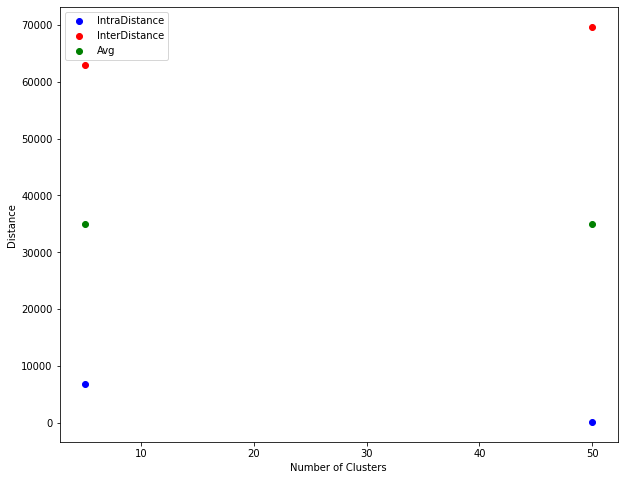

In [ ]:
plt.figure(figsize = (10,8))

for key, (d1, d2) in elbow_dict.items():
  plt.scatter(key, d1, color = "b")
  plt.scatter(key, d2, color = "r")
  plt.scatter(key, (d1+d2)/2, color = "g")
plt.legend(["IntraDistance", "InterDistance", "Avg"])
plt.xlabel("Number of Clusters")
plt.ylabel("Distance")
  # print(key)


In [ ]:
for i in range(nClusters):
  print(clusters_label[i])

##Classification

In [ ]:
embeddings.shape

(337, 384)

In [ ]:
x_train_informatic = np.array(embeddings)
y_train_informatic = np.ones(embeddings.shape[0])
x_train_nonInformatic = np.array(embeddings)
y_train_nonInformatic = np.zeros(embeddings.shape[0])

In [ ]:
data = np.vstack((x_train_informatic, x_train_nonInformatic))
label = np.hstack((y_train_informatic, y_train_nonInformatic))
print(data.shape)
print(label.shape)
data, label = shuffle(data, label)
# print(label)

(674, 384)
(674,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(471, 384)
(203, 384)
(471,)
(203,)


##KNN

Accuracy obtained using K = 1 is: 0.32019704433497537
Accuracy obtained using K = 2 is: 0.4039408866995074
Accuracy obtained using K = 3 is: 0.3645320197044335
Accuracy obtained using K = 4 is: 0.4039408866995074
Accuracy obtained using K = 5 is: 0.39901477832512317
Accuracy obtained using K = 6 is: 0.4236453201970443
Accuracy obtained using K = 7 is: 0.41379310344827586
Accuracy obtained using K = 8 is: 0.43349753694581283
Accuracy obtained using K = 9 is: 0.4088669950738916
Accuracy obtained using K = 10 is: 0.39901477832512317


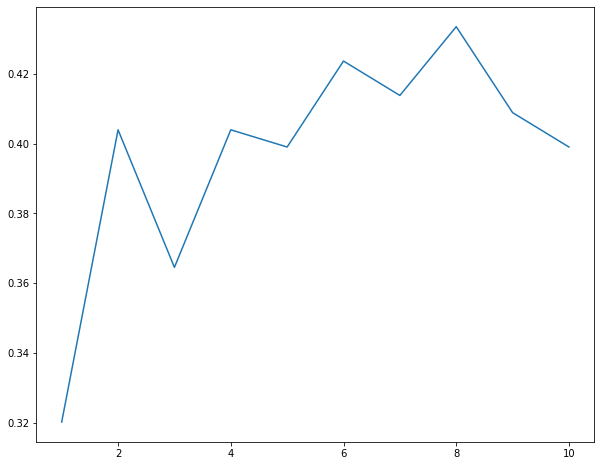

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
acc_knn = []

k_values = list(range(1, 11))
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    acc_knn.append(score)
    print(f"Accuracy obtained using K = {k} is: {score}")

plt.figure(figsize = (10,8))
plt.plot(k_values, acc_knn)

##Perceptron

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler

perceptron = make_pipeline(StandardScaler(), Perceptron(
    penalty='l1',
    eta0=0.3,
    random_state=2000
))
perceptron.fit(X_train, y_train)
acc_perceptron = perceptron.score(X_test, y_test)
print(acc_perceptron)

0.4088669950738916


##MLP

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
mlp = make_pipeline(MinMaxScaler((-1,1)), 
    MLPClassifier(
        activation='relu',
        hidden_layer_sizes=X_train.shape[1],
        max_iter=1000,
        random_state=2000
    )
)
mlp.fit(X_train, y_train)

acc_mlp = mlp.score(X_test, y_test)



##SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
svm = make_pipeline(StandardScaler(), SVC(kernel="rbf", C=2.5, degree=4, coef0=0.01, random_state=2000, max_iter = 5000))
svm.fit(X_train, y_train)
svm_accuracies = svm.score(X_test, y_test)

##Rest of the Code

**extract key numbers**

In [ ]:
#   relatedNumKeyBert was created above

print("len:", len(relatedNumKeyBert))
relatedNumKeyBert[290:300]
np.array(relatedNumKeyBert).shape

len: 327


(327, 5)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

K_CLUSTER_NUMBERS=2
vectorizer = TfidfVectorizer() 
kmeans = KMeans(n_clusters = K_CLUSTER_NUMBERS, init = 'k-means++').fit(relatedNumKeyBert)
# kmeans.labels_

In [ ]:
clusters=np.zeros(K_CLUSTER_NUMBERS);cluster_1=[];cluster_2=[];cluster_3=[]
for wordlistIndx in range(0,len(arrOfKeywordsWithoutSimilarity)):
  cat = kmeans.labels_[wordlistIndx]
  if cat==0:
      cluster_0.append(arrOfKeywordsWithoutSimilarity[wordlistIndx])
  elif cat==1:
      cluster_1.append(arrOfKeywordsWithoutSimilarity[wordlistIndx])
  elif cat==2:
      cluster_2.append(arrOfKeywordsWithoutSimilarity[wordlistIndx])
  elif cat==3:    
      cluster_3.append(arrOfKeywordsWithoutSimilarity[wordlistIndx])

print("Clusters:")
print(cluster_0,'\n',cluster_1,'\n',cluster_2,'\n',cluster_3)

[['exam', 'java', 'implement', 'practic', 'concept'], ['java', 'program', 'practic', 'interact', 'particip'], ['student', 'program', 'exam', 'implement', 'homework'], ['exam', 'comput', 'basic', 'student', 'design'], ['project', 'program', 'student', 'comput', 'implement'], ['sql', 'implement', 'conceptu', 'design', 'basic'], ['develop', 'process', 'comput', 'exam', 'technolog'], ['seminar', 'presentationbefor', 'informatik', 'scientif', 'informat'], ['student', 'exam', 'logic', 'mathemat', 'vocabulari'], ['algorithm', 'exam', 'program', 'implement', 'algebra'], ['student', 'social', 'interdisciplinari', 'societyâ', 'develop'], ['develop', 'practic', 'program', 'exam', 'implement'], ['program', 'develop', 'student', 'comput', 'algorithm'], ['implement', 'program', 'parallel', 'design', 'develop'], ['program', 'student', 'direct3d', 'comput', 'parallel'], ['java', 'automaton', 'program', 'algorithm', 'diagram'], ['student', 'grade', 'practic', 'approach', 'concept'], ['exam', 'student',